# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Load Wholesale Customers Dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)

# Drop categorical columns (Region & Channel) for clustering

In [3]:
X = df.iloc[:, 2:].values  # Using only numerical features

# Standardize features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding the Optimal Number of Clusters (Elbow Method)

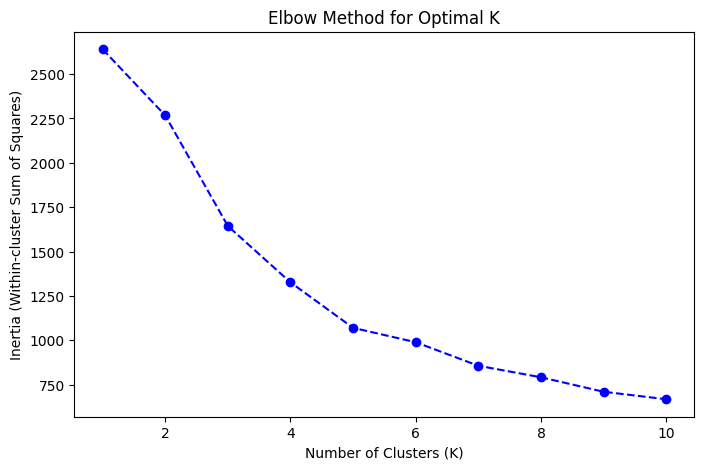

In [4]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="--", color="blue")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

# Train K-Means Model (Using K=4 based on Elbow Method)

In [5]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
df["Cluster"] = clusters

# Evaluate Cluster Quality (Silhouette Score)

In [6]:
sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {sil_score:.2f} (Higher is better)")

Silhouette Score: 0.35 (Higher is better)


# Visualizing Clusters in 2D

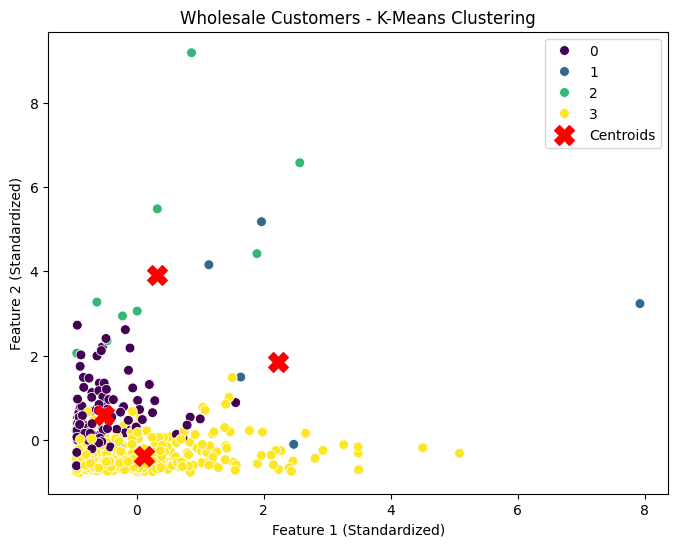

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette="viridis", s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", s=200, marker="X", label="Centroids")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.title("Wholesale Customers - K-Means Clustering")
plt.legend()
plt.show()

# Visualizing Clusters in 3D

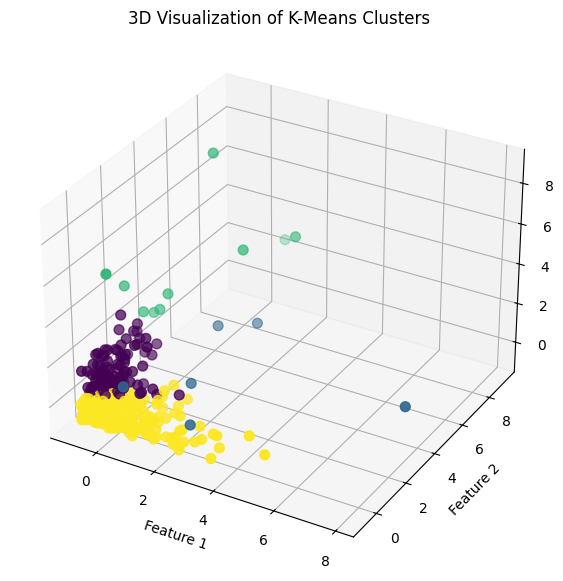

In [8]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=clusters, cmap="viridis", s=50)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("3D Visualization of K-Means Clusters")
plt.show()

# Comparing K-Means Clusters with True Labels

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10660\3289061580.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cluster", data=df, palette="coolwarm")


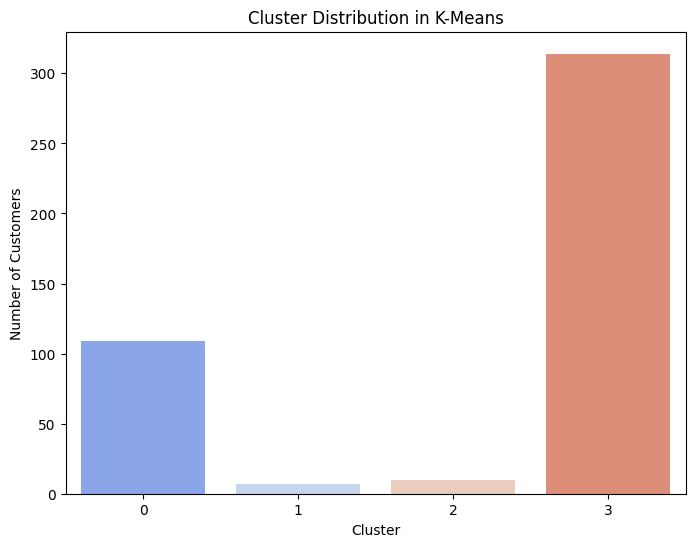

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Cluster", data=df, palette="coolwarm")
plt.title("Cluster Distribution in K-Means")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()